## Music Genre Prediction


> by Shreya Karakata




### Importing Libaries

In [ ]:
#Importing libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [ ]:
#Loading dataset
from google.colab import files
file = files.upload()
df = pd.read_csv("music_genre.csv")
df.head()

Saving music_genre.csv to music_genre.csv


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


### Data Exploration

In [ ]:
#Getting info of dataframe with column name , data type  and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
#Checking for number of null values
df.isnull().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [ ]:
#Checking for rows with the null values
df[df.isnull().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dropping the 5 rows with null values
df.dropna(axis=0, how='all', inplace=True)
df.shape

(50000, 18)

In [ ]:
#Numerical columns stats
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [ ]:
#Categorical columns stats
df.describe(include=['O'])

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,50000,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,5,10
top,empty_field,Home,G,Major,?,4-Apr,Electronic
freq,2489,16,5727,32099,4980,44748,5000


In [ ]:
df['obtained_date'].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', '0/4'], dtype=object)

In [ ]:
df.drop(columns=['obtained_date','instance_id'],inplace=True)
df.shape

(50000, 16)

We see that obtained date hase only 5 unique ids, which will not provide any significant contribution to our model. The instance id is only an index and therefore will not provide any imapct on our model. Therefore we drop both of these columns.

Tempo column has '?' value. Imputing with mean and changing datatype from object to float for tempo column


In [ ]:
df['tempo'].unique()

array(['100.889', '115.00200000000001', '127.994', ..., '112.97',
       '167.655', '99.20100000000001'], dtype=object)

In [ ]:
#Imputing with mean
df['tempo']= df['tempo'].astype(str)
df['tempo']=df['tempo'].replace('?',np.nan)
df['tempo']=pd.to_numeric(df['tempo'])
df['tempo'].fillna(df['tempo'].mean(),inplace=True)

Duration_ms column has '-1' value. Imputing with mean.

In [ ]:
df['duration_ms'].value_counts()

-1.0         4939
 240000.0      33
 192000.0      32
 180000.0      28
 216000.0      20
             ... 
 154574.0       1
 359213.0       1
 656213.0       1
 506320.0       1
 189483.0       1
Name: duration_ms, Length: 26028, dtype: int64

In [ ]:
#Imputing with mean
df['duration_ms']= df['duration_ms'].astype(str)
df['duration_ms']=df['duration_ms'].replace('-1.0',np.nan)
df['duration_ms']=pd.to_numeric(df['duration_ms'])
df['duration_ms'].fillna(df['duration_ms'].mean(),inplace=True)

In [ ]:
# Stats of of all numerical columns after preprocessing
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,44.220420,0.306383,0.558241,2.455035e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,119.952961,0.456264
std,15.542008,0.341340,0.178632,1.057864e+05,0.264559,0.325409,0.161637,6.162990,0.101373,29.075697,0.247119
min,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,34.000000,0.020000,0.442000,1.948750e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,96.775750,0.257000
50%,45.000000,0.144000,0.568000,2.360270e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,119.952961,0.448000
75%,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,139.468250,0.648000
max,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


Getting rid of further unwanted categorical values

In [ ]:
#Dropping artist_name,track_name
df.drop(columns=['artist_name','track_name'],inplace=True)
df.shape

(50000, 14)

Artist name has around 5% values missing in the dataset. We cannot impute these values. We also dont see any major impact on our model due to this variable, the same applies for
track name.

Next step is to encode categorical values so that we can use them in modeling

### Data Visualization

Distribution Categorical Feauture Variables

In [ ]:
df.describe(include=['O'])

,key,mode,music_genre
count,50000,50000,50000
unique,12,2,10
top,G,Major,Electronic
freq,5727,32099,5000


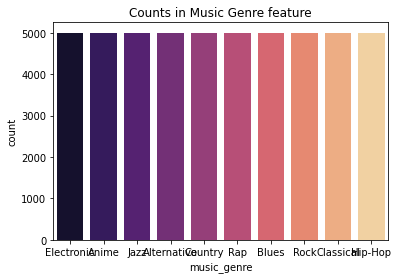

In [ ]:
# Music_genre
sns.countplot(x = 'music_genre', data = df, palette = "magma")
plt.title("Counts in Music Genre feature")
plt.show()

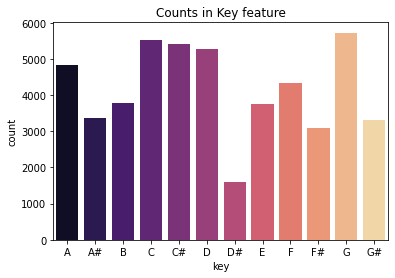

In [ ]:
# Key column- Univariate analysis
sns.countplot(x = 'key', data = df, palette = "magma", order = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"])
plt.title("Counts in Key feature")
plt.show()

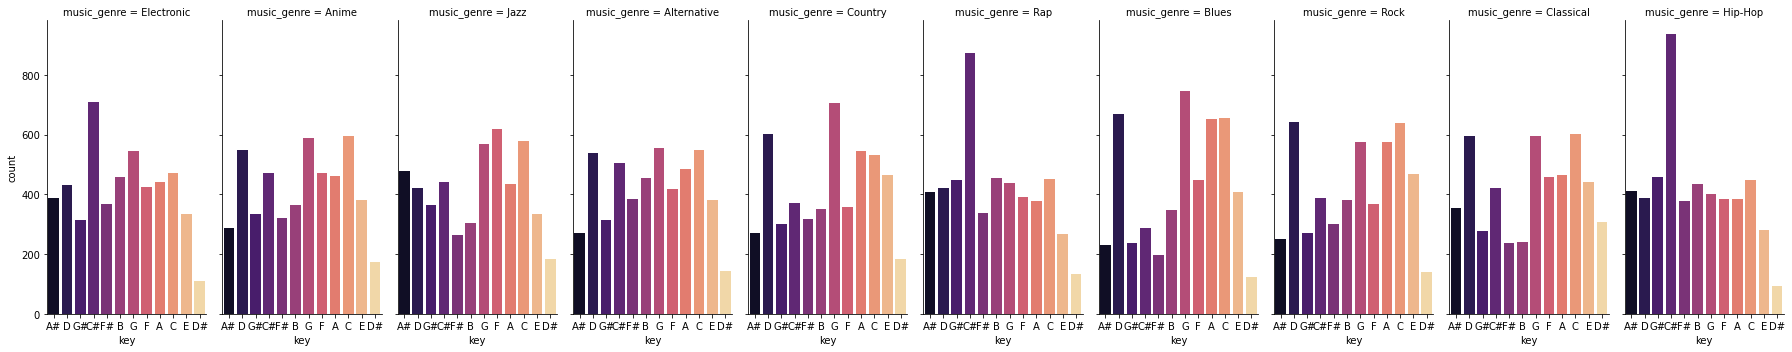

In [ ]:
# Key column - Bivariate analysis with music_genre(predictor column)
sns.catplot(x="key",col='music_genre',kind="count",palette = "magma", data=df,aspect=0.5)

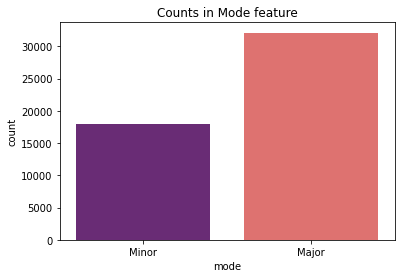

In [ ]:
# Mode column- Univariate analysis
sns.countplot(x = 'mode', data = df, palette = "magma")
plt.title("Counts in Mode feature")
plt.show()

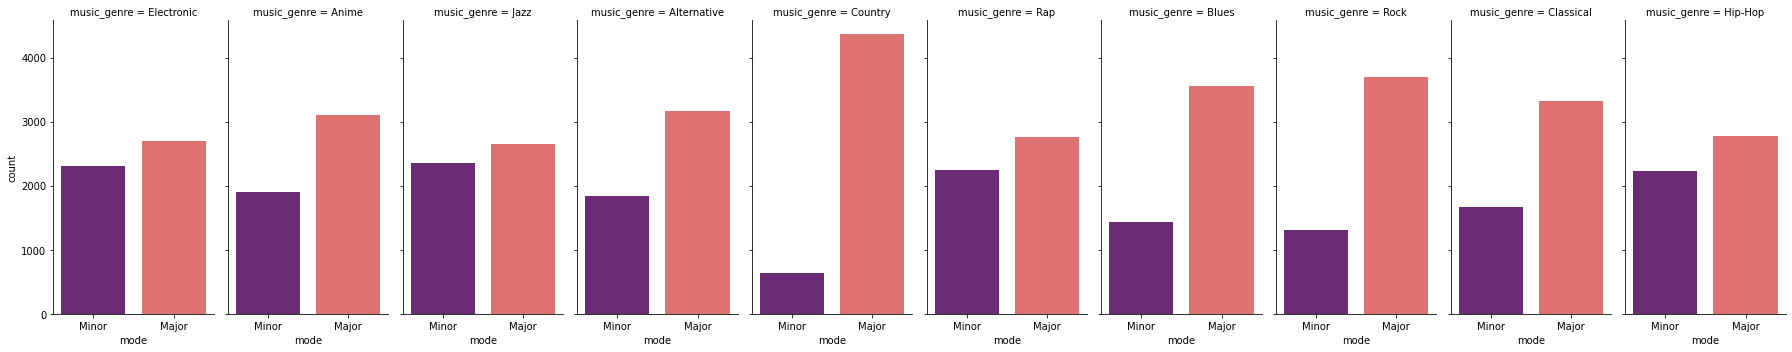

In [ ]:
# Mode column - Bivariate analysis with music_genre(predictor column)
sns.catplot(x="mode",col='music_genre',kind="count",palette = "magma", data=df,aspect=0.5)

 Distribution of numerical features


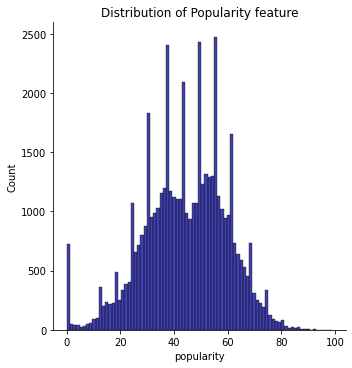

In [ ]:
# Popularity column- Univariate analysis
sns.displot(data=df, x="popularity",color='darkblue')
plt.title("Distribution of Popularity feature")
plt.show()

              count     mean        std   min    25%   50%   75%   max
music_genre                                                           
Alternative  5000.0  50.2242   7.664260   0.0  45.00  49.0  55.0  83.0
Anime        5000.0  24.2716   9.675151   0.0  17.00  23.0  30.0  65.0
Blues        5000.0  34.8040   9.716422   0.0  28.75  33.0  39.0  80.0
Classical    5000.0  29.3158  14.100519   0.0  25.00  32.0  38.0  68.0
Country      5000.0  46.0100   9.771540   0.0  39.00  44.0  52.0  82.0
Electronic   5000.0  38.1118   9.715378   0.0  31.00  37.0  44.0  96.0
Hip-Hop      5000.0  58.3996   8.302271  18.0  52.00  57.0  63.0  96.0
Jazz         5000.0  40.9286   9.517333   0.0  36.00  40.0  46.0  79.0
Rap          5000.0  60.4974   8.160620  14.0  55.00  59.0  65.0  99.0
Rock         5000.0  59.6412   7.359110   0.0  55.00  59.0  64.0  90.0


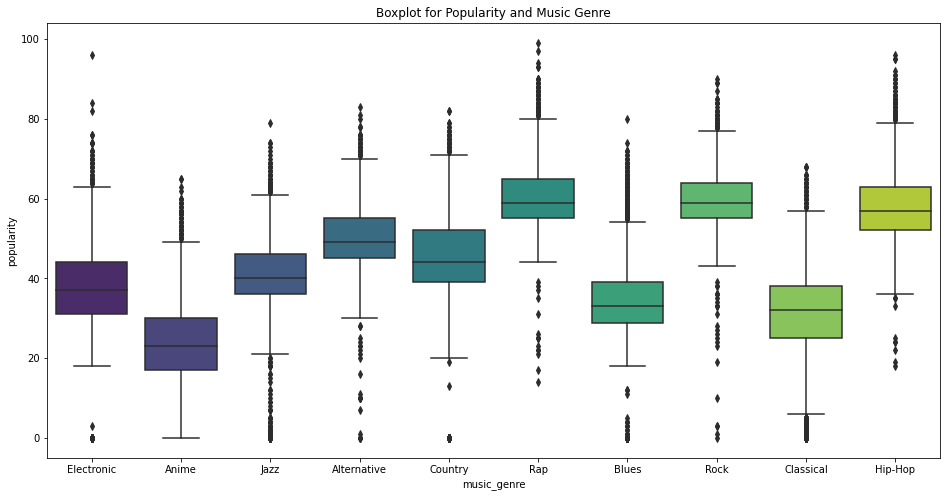

In [ ]:
# Popularity column - Bivariate analysis with music_genre(predictor column)
print(df.groupby('music_genre')['popularity'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='popularity',palette='viridis')
plt.title("Boxplot for Popularity and Music Genre")
plt.show()

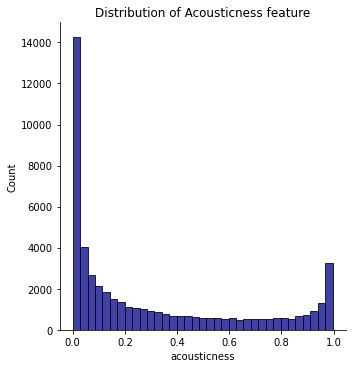

In [ ]:
# Acousticness column- Univariate analysis
sns.displot(data=df, x="acousticness",color='darkblue')
plt.title("Distribution of Acousticness feature")
plt.show()

              count      mean       std       min       25%      50%      75%  \
music_genre                                                                     
Alternative  5000.0  0.164983  0.242942  0.000001  0.002087  0.03360  0.24000   
Anime        5000.0  0.286968  0.362371  0.000000  0.005193  0.06650  0.57600   
Blues        5000.0  0.317830  0.306287  0.000002  0.037875  0.21500  0.55725   
Classical    5000.0  0.869139  0.256728  0.000001  0.909000  0.96700  0.98800   
Country      5000.0  0.268827  0.262072  0.000028  0.046525  0.17500  0.43425   
Electronic   5000.0  0.121971  0.201634  0.000002  0.004060  0.02620  0.14000   
Hip-Hop      5000.0  0.179093  0.189449  0.000015  0.033900  0.10900  0.26700   
Jazz         5000.0  0.494564  0.338640  0.000002  0.153000  0.51500  0.81900   
Rap          5000.0  0.169057  0.192257  0.000007  0.024675  0.09385  0.25300   
Rock         5000.0  0.191394  0.249029  0.000001  0.008555  0.06995  0.29600   

               max  
music_

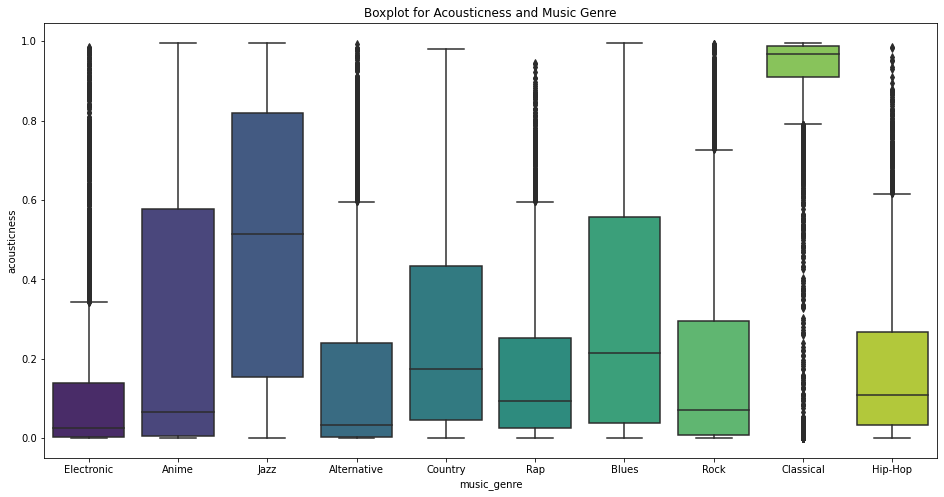

In [ ]:
# Acousticness column - Bivariate analysis with music_genre(Predictor column)
print(df.groupby('music_genre')['acousticness'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='acousticness',palette='viridis')
plt.title("Boxplot for Acousticness and Music Genre")
plt.show()

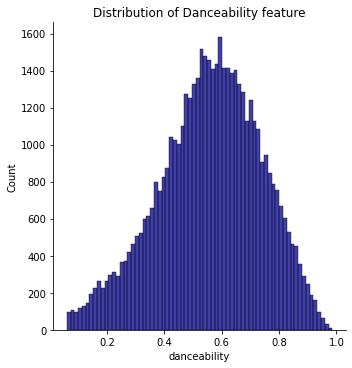

In [ ]:
# Danceability column- Univariate analysis
sns.displot(data=df, x="danceability",color='darkblue')
plt.title("Distribution of Danceability feature")
plt.show()

              count      mean       std     min      25%    50%      75%  \
music_genre                                                                
Alternative  5000.0  0.541124  0.150073  0.0617  0.44100  0.539  0.64300   
Anime        5000.0  0.471002  0.148760  0.0606  0.37900  0.488  0.57800   
Blues        5000.0  0.529243  0.144694  0.1180  0.42600  0.529  0.63500   
Classical    5000.0  0.306560  0.135138  0.0600  0.19800  0.301  0.40200   
Country      5000.0  0.577316  0.108931  0.2030  0.50900  0.581  0.64725   
Electronic   5000.0  0.619220  0.147034  0.0822  0.52900  0.629  0.72400   
Hip-Hop      5000.0  0.717373  0.130400  0.2300  0.64000  0.733  0.81400   
Jazz         5000.0  0.584736  0.159487  0.0596  0.47200  0.600  0.70500   
Rap          5000.0  0.696605  0.140232  0.1970  0.60200  0.714  0.80100   
Rock         5000.0  0.539230  0.134110  0.0645  0.45175  0.546  0.63300   

               max  
music_genre         
Alternative  0.971  
Anime        0.905  
Blu

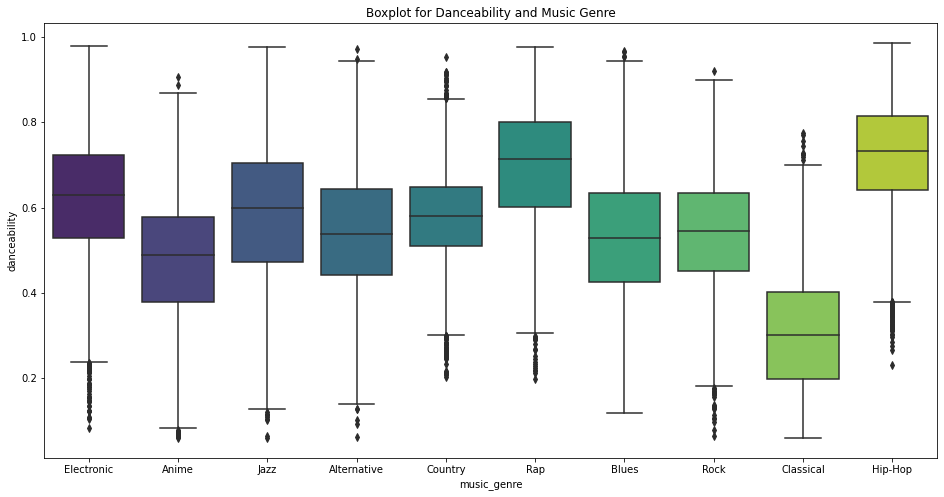

In [ ]:
# Danceability column - Bivariate analysis with music_genre(Predictor column)
print(df.groupby('music_genre')['danceability'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='danceability',palette='viridis')
plt.title("Boxplot for Danceability and Music Genre")
plt.show()

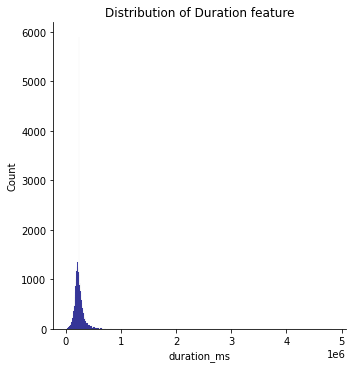

In [ ]:
# Duration_ms column- Univariate analysis
sns.displot(data=df, x="duration_ms",color='darkblue')
plt.title("Distribution of Duration feature")
plt.show()

               count           mean            std      min        25%  \
music_genre                                                              
0            40000.0  239978.118187   87883.023218  19693.0  195331.25   
1             5000.0  232105.558623   80882.984473  30027.0  191986.75   
2             5000.0  303104.910538  199612.202989  15509.0  188996.75   

                       50%        75%        max  
music_genre                                       
0            232375.500000  261748.25  4830606.0  
1            245503.541466  272993.25  1295600.0  
2            245503.541466  362070.25  3195440.0  


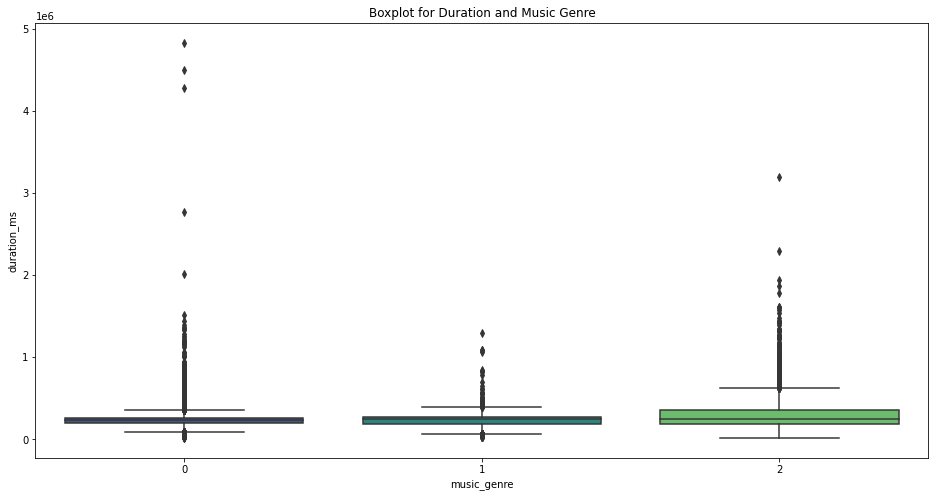

In [ ]:
# Duration_ms column - Bivariate analysis with music_genre(Predictor column)
print(df.groupby('music_genre')['duration_ms'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='duration_ms',palette='viridis')
plt.title("Boxplot for Duration and Music Genre")
plt.show()

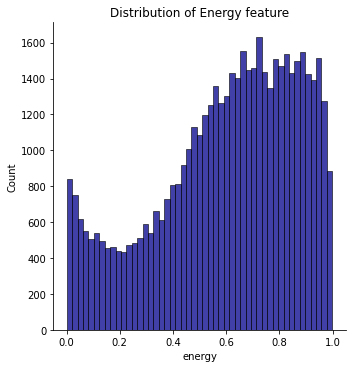

In [ ]:
# Energy column- Univariate analysis
sns.displot(data=df, x="energy",color='darkblue')
plt.title("Distribution of Energy feature")
plt.show()

              count      mean       std       min      25%     50%      75%  \
music_genre                                                                   
Alternative  5000.0  0.710880  0.206841  0.048400  0.55700  0.7470  0.89025   
Anime        5000.0  0.664568  0.300289  0.000943  0.42200  0.7830  0.92500   
Blues        5000.0  0.609753  0.227894  0.009570  0.44400  0.6290  0.80000   
Classical    5000.0  0.176534  0.225583  0.000792  0.03660  0.1010  0.20700   
Country      5000.0  0.638903  0.199112  0.021000  0.49800  0.6700  0.80400   
Electronic   5000.0  0.738636  0.187862  0.021100  0.61100  0.7730  0.89700   
Hip-Hop      5000.0  0.644334  0.150461  0.095200  0.54175  0.6475  0.75300   
Jazz         5000.0  0.474847  0.239362  0.002110  0.28900  0.4780  0.65700   
Rap          5000.0  0.651301  0.156123  0.079300  0.54275  0.6490  0.76300   
Rock         5000.0  0.687792  0.200963  0.002590  0.55100  0.7230  0.85225   

               max  
music_genre         
Alternati

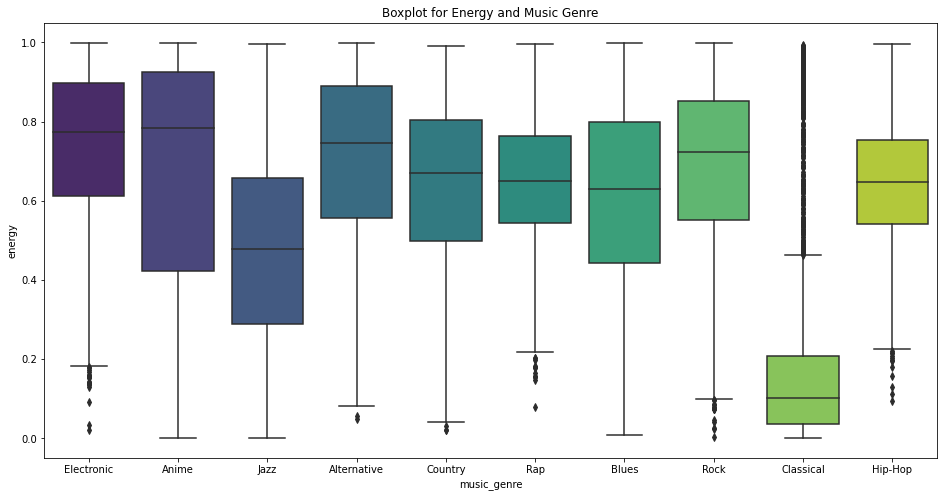

In [ ]:
# Energy column - Bivariate analysis with music_genre(Predictor column)
print(df.groupby('music_genre')['energy'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='energy',palette='viridis')
plt.title("Boxplot for Energy and Music Genre")
plt.show()

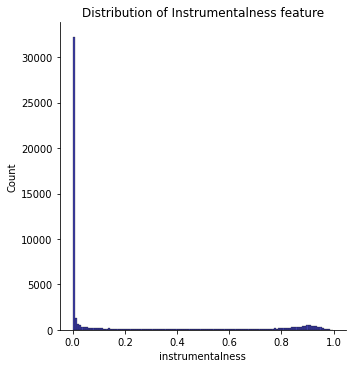

In [ ]:
# Instrumentalness column- Univariate analysis
sns.displot(data=df, x="instrumentalness",color='darkblue')
plt.title("Distribution of Instrumentalness feature")
plt.show()

              count      mean       std  min      25%       50%       75%  \
music_genre                                                                 
Alternative  5000.0  0.060818  0.174351  0.0  0.00000  0.000068  0.006600   
Anime        5000.0  0.278057  0.390610  0.0  0.00000  0.000400  0.768000   
Blues        5000.0  0.094134  0.213205  0.0  0.00001  0.000957  0.038000   
Classical    5000.0  0.600692  0.378027  0.0  0.14875  0.832000  0.905000   
Country      5000.0  0.005320  0.041110  0.0  0.00000  0.000000  0.000039   
Electronic   5000.0  0.348139  0.361742  0.0  0.00316  0.182000  0.749250   
Hip-Hop      5000.0  0.010836  0.073129  0.0  0.00000  0.000000  0.000011   
Jazz         5000.0  0.354271  0.383342  0.0  0.00017  0.120500  0.797000   
Rap          5000.0  0.009084  0.065314  0.0  0.00000  0.000000  0.000010   
Rock         5000.0  0.054656  0.166545  0.0  0.00000  0.000044  0.005115   

               max  
music_genre         
Alternative  0.942  
Anime       

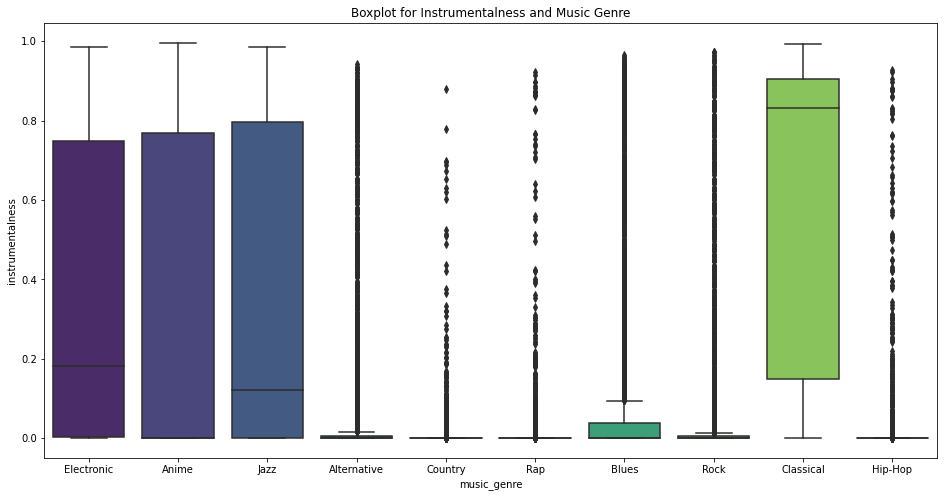

In [ ]:
# Instrumentalness column - Bivariate analysis with music_genre(Predictor column)
print(df.groupby('music_genre')['instrumentalness'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='instrumentalness',palette='viridis')
plt.title("Boxplot for Instrumentalness and Music Genre")
plt.show()

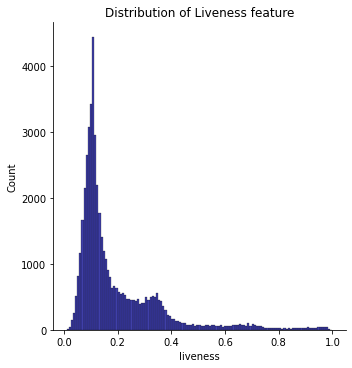

In [ ]:
# Liveness column- Univariate analysis
sns.displot(data=df, x="liveness",color='darkblue')
plt.title("Distribution of Liveness feature")
plt.show()

              count      mean       std      min       25%    50%      75%  \
music_genre                                                                  
Alternative  5000.0  0.197119  0.156115  0.02120  0.099000  0.132  0.25600   
Anime        5000.0  0.193444  0.138930  0.01690  0.098800  0.137  0.27525   
Blues        5000.0  0.233206  0.220590  0.00967  0.097700  0.139  0.28600   
Classical    5000.0  0.161046  0.143591  0.02250  0.088975  0.110  0.15700   
Country      5000.0  0.187781  0.153594  0.02120  0.098600  0.128  0.23100   
Electronic   5000.0  0.209782  0.176166  0.01730  0.095800  0.129  0.28325   
Hip-Hop      5000.0  0.200870  0.153262  0.01960  0.103000  0.136  0.26200   
Jazz         5000.0  0.171721  0.147107  0.01880  0.094200  0.115  0.18300   
Rap          5000.0  0.198035  0.151165  0.02080  0.103000  0.135  0.25400   
Rock         5000.0  0.185961  0.149025  0.01570  0.094100  0.126  0.23800   

               max  
music_genre         
Alternative  0.996  


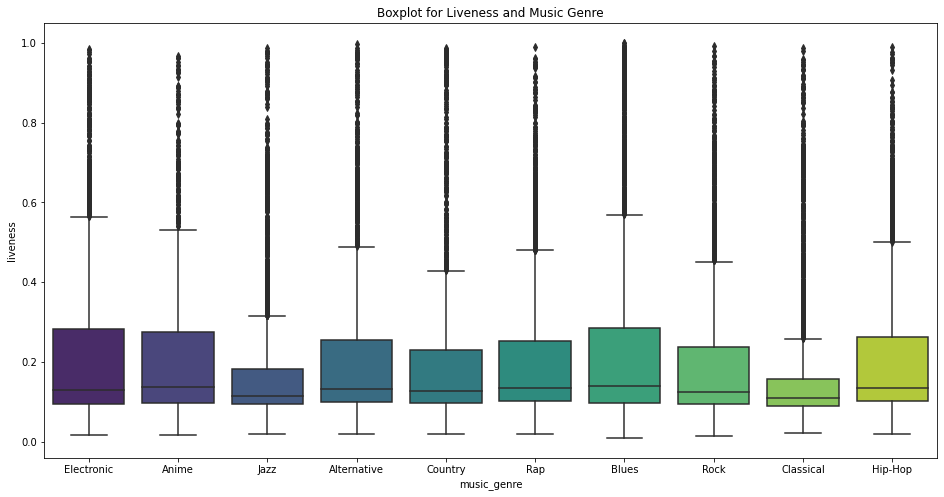

In [ ]:
# Liveness column - Bivariate analysis with music_genre(Predictor column)
print(df.groupby('music_genre')['liveness'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='liveness',palette='viridis')
plt.title("Boxplot for Liveness and Music Genre")
plt.show()

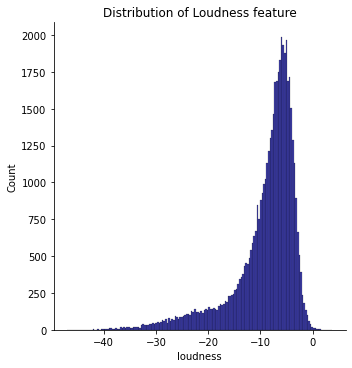

In [ ]:
# Loudness column- Univariate analysis
sns.displot(data=df, x="loudness",color='darkblue')
plt.title("Distribution of Loudness feature")
plt.show()

              count       mean       std     min       25%      50%       75%  \
music_genre                                                                     
Alternative  5000.0  -6.517714  2.767036 -22.191  -7.98250  -5.9930  -4.50000   
Anime        5000.0  -7.963515  6.246825 -41.234 -10.69125  -5.6605  -3.58900   
Blues        5000.0  -9.009528  3.833429 -31.284 -11.31600  -8.4555  -6.17675   
Classical    5000.0 -21.586253  7.730315 -47.046 -26.44300 -21.8725 -17.23300   
Country      5000.0  -7.297150  3.210097 -27.119  -8.80225  -6.5275  -5.02000   
Electronic   5000.0  -7.034238  3.683159 -25.582  -9.26050  -6.4650  -4.37600   
Hip-Hop      5000.0  -6.851158  2.457706 -25.602  -8.16025  -6.5090  -5.20350   
Jazz         5000.0 -11.185364  4.662576 -35.200 -13.62125 -10.3455  -7.84350   
Rap          5000.0  -6.668337  2.427193 -22.589  -7.97650  -6.3550  -5.03775   
Rock         5000.0  -7.224354  3.311059 -37.124  -9.00050  -6.4400  -4.83075   

               max  
music_

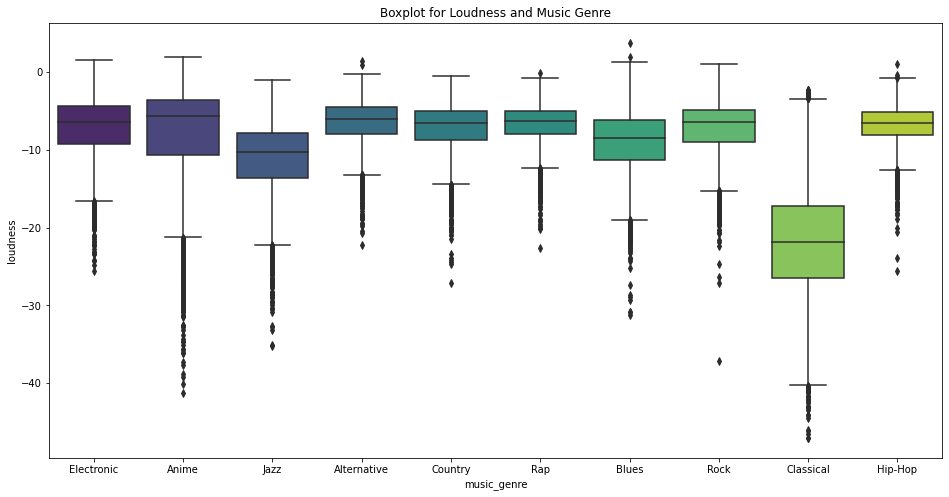

In [ ]:
# Loudness column - Bivariate analysis with music_genre(Predictor column)
print(df.groupby('music_genre')['loudness'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='loudness',palette='viridis')
plt.title("Boxplot for Loudness and Music Genre")
plt.show()

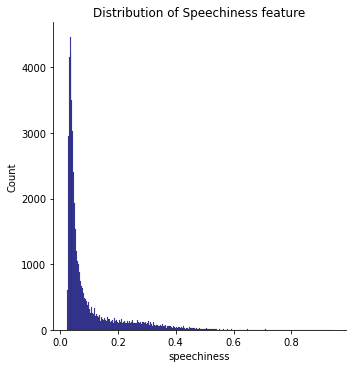

In [ ]:
# Speechiness column- Univariate analysis
sns.displot(data=df, x="speechiness",color='darkblue')
plt.title("Distribution of Speechiness feature")
plt.show()

              count      mean       std     min       25%     50%     75%  \
music_genre                                                                 
Alternative  5000.0  0.088819  0.092578  0.0231  0.035900  0.0519  0.0969   
Anime        5000.0  0.064608  0.052907  0.0229  0.034800  0.0452  0.0708   
Blues        5000.0  0.062157  0.062483  0.0231  0.033875  0.0431  0.0650   
Classical    5000.0  0.051575  0.037965  0.0239  0.038400  0.0433  0.0506   
Country      5000.0  0.049032  0.048846  0.0223  0.029500  0.0346  0.0456   
Electronic   5000.0  0.098891  0.098593  0.0234  0.040100  0.0575  0.1110   
Hip-Hop      5000.0  0.207044  0.136928  0.0246  0.085450  0.1920  0.2990   
Jazz         5000.0  0.073629  0.081572  0.0226  0.035300  0.0438  0.0676   
Rap          5000.0  0.186707  0.132777  0.0229  0.070100  0.1585  0.2800   
Rock         5000.0  0.053403  0.041686  0.0224  0.031900  0.0391  0.0563   

               max  
music_genre         
Alternative  0.941  
Anime       

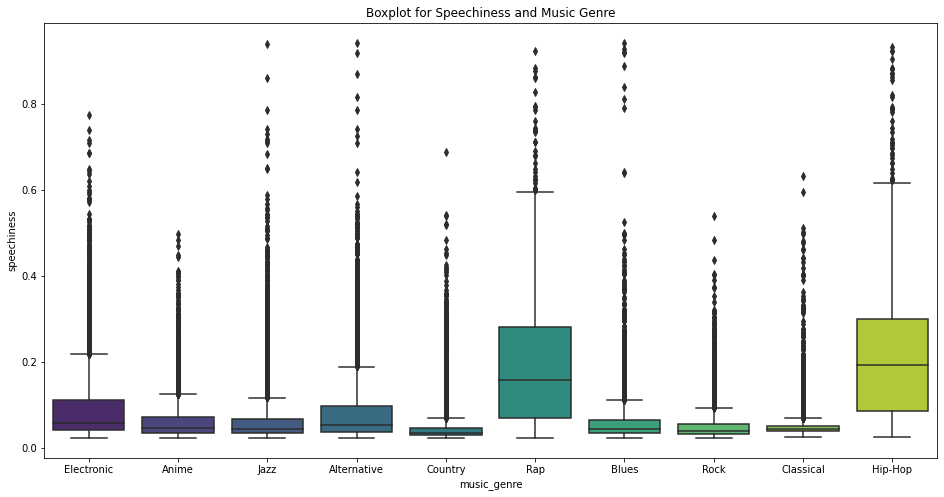

In [ ]:
# Speechiness	 column - Bivariate analysis with music_genre(Predictor column)
print(df.groupby('music_genre')['speechiness'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='speechiness',palette='viridis')
plt.title("Boxplot for Speechiness and Music Genre")
plt.show()

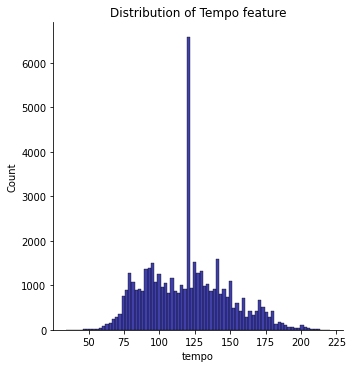

In [ ]:
# Tempo column- Univariate analysis
sns.displot(data=df, x="tempo",color='darkblue')
plt.title("Distribution of Tempo feature")
plt.show()

              count        mean        std     min        25%         50%  \
music_genre                                                                 
Alternative  5000.0  122.285214  28.666120  44.194   99.97650  119.952961   
Anime        5000.0  126.111168  31.423527  47.704  101.56700  123.018000   
Blues        5000.0  121.228699  28.677407  47.587   99.90150  119.952961   
Classical    5000.0  105.643167  29.741233  34.347   80.53150  102.634000   
Country      5000.0  123.390426  28.517677  55.513  102.74075  119.952961   
Electronic   5000.0  125.292162  25.095667  35.551  110.07500  122.997000   
Hip-Hop      5000.0  120.134821  28.411417  47.092   95.04975  119.952961   
Jazz         5000.0  112.490105  28.296298  34.765   91.06125  109.403000   
Rap          5000.0  120.522753  27.789878  47.811   96.78100  119.952961   
Rock         5000.0  122.431092  27.636934  37.114  101.67275  119.952961   

                   75%      max  
music_genre                      
Alterna

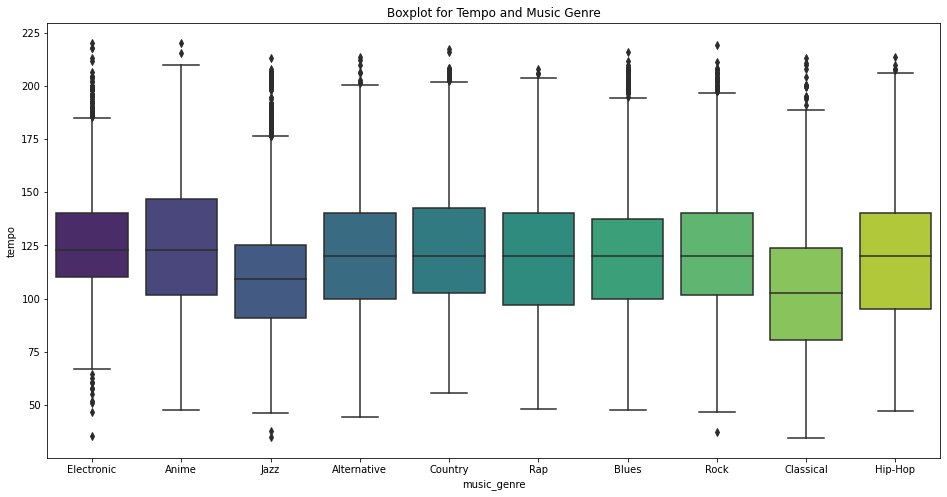

In [ ]:
# Tempo column - Bivariate analysis with music_genre(Predictor column)
print(df.groupby('music_genre')['tempo'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='tempo',palette='viridis')
plt.title("Boxplot for Tempo and Music Genre")
plt.show()

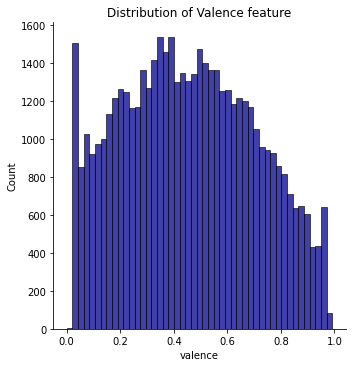

In [ ]:
# Valence column- Univariate analysis
sns.displot(data=df, x="valence",color='darkblue')
plt.title("Distribution of Valence feature")
plt.show()

              count      mean       std     min      25%     50%      75%  \
music_genre                                                                 
Alternative  5000.0  0.447513  0.216445  0.0342  0.28300  0.4285  0.60000   
Anime        5000.0  0.437670  0.248353  0.0000  0.23200  0.4390  0.63200   
Blues        5000.0  0.580788  0.224741  0.0315  0.41000  0.5900  0.76000   
Classical    5000.0  0.210523  0.197650  0.0000  0.05650  0.1400  0.30525   
Country      5000.0  0.536732  0.221114  0.0396  0.36100  0.5270  0.71625   
Electronic   5000.0  0.389884  0.239673  0.0205  0.18900  0.3585  0.55900   
Hip-Hop      5000.0  0.474927  0.220622  0.0336  0.30300  0.4735  0.64300   
Jazz         5000.0  0.509248  0.251076  0.0289  0.29675  0.5150  0.71100   
Rap          5000.0  0.454999  0.213480  0.0336  0.28900  0.4460  0.61200   
Rock         5000.0  0.520361  0.233627  0.0277  0.34000  0.5160  0.70300   

               max  
music_genre         
Alternative  0.983  
Anime       

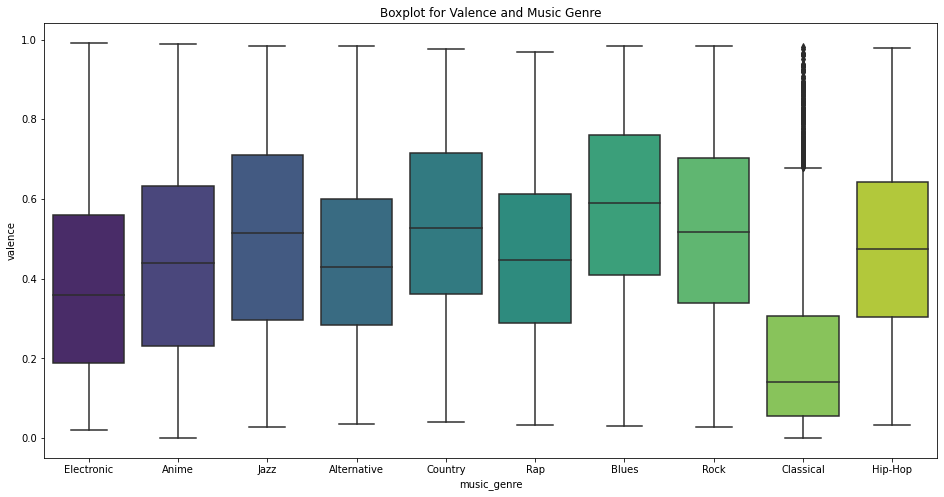

In [ ]:
# Valence column - Bivariate analysis with music_genre(Predictor column)
print(df.groupby('music_genre')['valence'].describe())
plt.figure(figsize=(16,8))
sns.boxplot(data=df, x='music_genre', y='valence',palette='viridis')
plt.title("Boxplot for Valence and Music Genre")
plt.show()

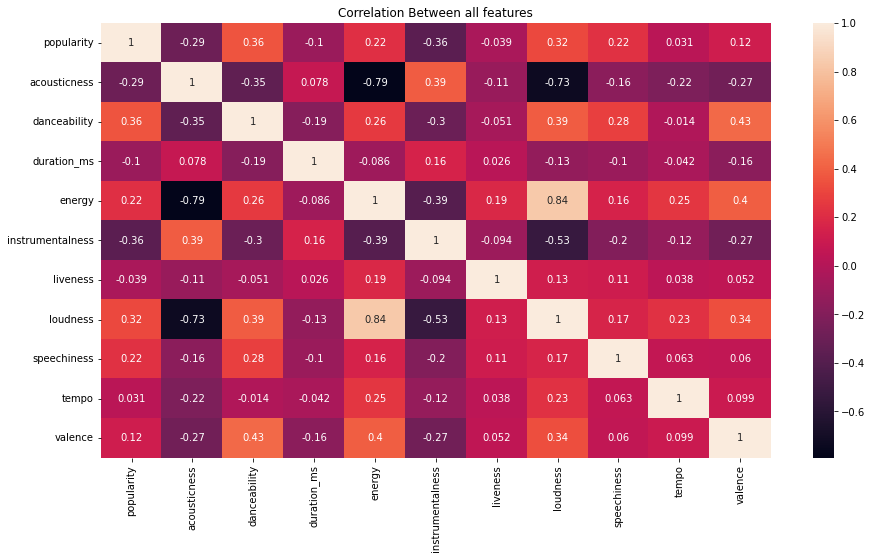

In [ ]:
#Correlation between features
plt.figure(figsize=(15, 8))
sns.color_palette("mako", as_cmap=True)
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Between all features")
plt.show()

### Feature Engineering

Encoding mode column - using one hot encoding

In [ ]:
df['mode'].unique()

array(['Minor', 'Major'], dtype=object)

In [ ]:
#Applying one hot encoding for the mode column and further deleting mode column
one_hot_encoded_data = pd.get_dummies(df['mode'])
df = df.join(one_hot_encoded_data)
df.drop(columns=['mode'],inplace=True)
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,Major,Minor
0,27.0,0.00468,0.652,245503.541466,0.941,0.79200,A#,0.115,-5.201,0.0748,100.889,0.759,Electronic,0,1
1,31.0,0.01270,0.622,218293.000000,0.890,0.95000,D,0.124,-7.043,0.0300,115.002,0.531,Electronic,0,1
2,28.0,0.00306,0.620,215613.000000,0.755,0.01180,G#,0.534,-4.617,0.0345,127.994,0.333,Electronic,1,0
3,34.0,0.02540,0.774,166875.000000,0.700,0.00253,C#,0.157,-4.498,0.2390,128.014,0.270,Electronic,1,0
4,32.0,0.00465,0.638,222369.000000,0.587,0.90900,F#,0.157,-6.266,0.0413,145.036,0.323,Electronic,1,0


In [ ]:
df['key'].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

In [ ]:
# encoding for key column
one_hot_encoded_data_2 = pd.get_dummies(df['key'])
df = df.join(one_hot_encoded_data_2)
df.drop(columns=['key'],inplace=True)
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,27.0,0.00468,0.652,245503.541466,0.941,0.79200,0.115,-5.201,0.0748,100.889,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.000000,0.890,0.95000,0.124,-7.043,0.0300,115.002,...,0,0,0,1,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.000000,0.755,0.01180,0.534,-4.617,0.0345,127.994,...,0,0,0,0,0,0,0,0,0,1
3,34.0,0.02540,0.774,166875.000000,0.700,0.00253,0.157,-4.498,0.2390,128.014,...,0,0,1,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.000000,0.587,0.90900,0.157,-6.266,0.0413,145.036,...,0,0,0,0,0,0,0,1,0,0


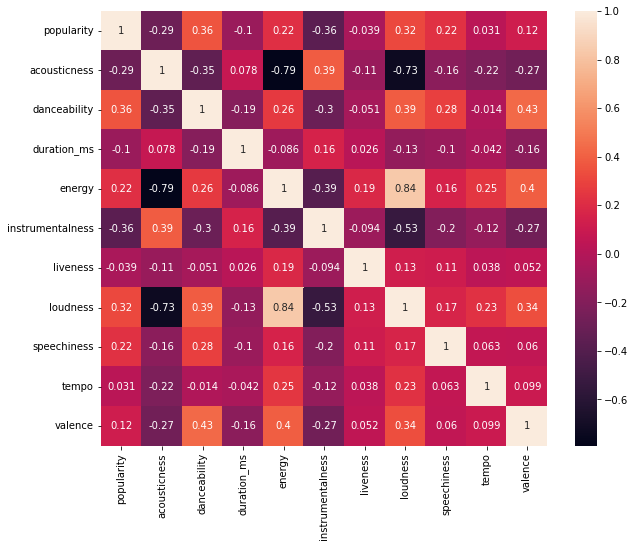

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,:11].corr(), annot=True)
plt.show()

### Data Modeling

In [ ]:
df['music_genre'].unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

In [ ]:
df['music_genre'] = df['music_genre'].astype('category')
y = df['music_genre'].cat.codes
y_names = list(df['music_genre'].cat.categories)

In [ ]:
X=df.drop(['music_genre'],axis=1)

In [ ]:
X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
0,27.0,0.00468,0.652,245503.541466,0.941,0.79200,0.115,-5.201,0.0748,100.889,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.01270,0.622,218293.000000,0.890,0.95000,0.124,-7.043,0.0300,115.002,...,0,0,0,1,0,0,0,0,0,0
2,28.0,0.00306,0.620,215613.000000,0.755,0.01180,0.534,-4.617,0.0345,127.994,...,0,0,0,0,0,0,0,0,0,1
3,34.0,0.02540,0.774,166875.000000,0.700,0.00253,0.157,-4.498,0.2390,128.014,...,0,0,1,0,0,0,0,0,0,0
4,32.0,0.00465,0.638,222369.000000,0.587,0.90900,0.157,-6.266,0.0413,145.036,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,59.0,0.03340,0.913,245503.541466,0.574,0.00000,0.119,-7.022,0.2980,98.028,...,0,0,1,0,0,0,0,0,0,0
50001,72.0,0.15700,0.709,251860.000000,0.362,0.00000,0.109,-9.814,0.0550,122.043,...,1,0,0,0,0,0,0,0,0,0
50002,51.0,0.00597,0.693,189483.000000,0.763,0.00000,0.143,-5.443,0.1460,131.079,...,0,0,0,1,0,0,0,0,0,0
50003,65.0,0.08310,0.782,262773.000000,0.472,0.00000,0.106,-5.016,0.0441,75.886,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn import preprocessing  # Perform data standardization
from sklearn.model_selection import train_test_split  # split data
from sklearn.decomposition import PCA  # Linear dimensionality reduction

# Machine learning Algorithms
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree for classification
from sklearn.ensemble import RandomForestClassifier  # Random Forest ensemble for classification
from sklearn.svm import SVC  # C-Support Vector Classification

from sklearn.metrics import accuracy_score, confusion_matrix  # Top-k Accuracy classification score
from sklearn.metrics import classification_report  # Report precision, recall, f1-score, and more

Splitting data into train and test

In [ ]:
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
x_train.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
39092,52.0,0.01460,0.505,276840.000000,0.687,0.021800,0.189,-5.174,0.0288,119.952961,...,0,0,0,0,1,0,0,0,0,0
30898,32.0,0.75300,0.304,245503.541466,0.309,0.000000,0.115,-11.466,0.0292,135.199000,...,0,0,0,0,0,0,0,0,0,1
45283,65.0,0.41100,0.787,210862.000000,0.586,0.000311,0.118,-9.640,0.0695,119.952961,...,0,0,0,0,0,0,0,0,0,0
16403,44.0,0.00016,0.418,245503.541466,0.966,0.005690,0.222,-2.656,0.2130,174.920000,...,0,0,0,0,0,0,0,0,1,0
13658,48.0,0.11100,0.412,337733.000000,0.657,0.000088,0.150,-11.780,0.0887,129.119000,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Standardizing Data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(x_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_std = x_train[['popularity','danceability', 'energy','liveness','loudness','tempo','valence']]
scale = StandardScaler().fit(x_train[['popularity','danceability', 'energy','liveness','loudness','tempo','valence']])

In [ ]:
x_train_scaled = pd.DataFrame(scale.transform(x_train), columns=x_train.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(scale.transform(x_test), columns=x_test.columns, index=x_test.index)

In [ ]:
X_train_scaled = pd.DataFrame(scale.transform(x_train[['popularity','danceability', 'energy','liveness','loudness','tempo','valence']]), columns=X_train_std.columns, index=X_train_std.index)
x_test_scaled = pd.DataFrame(scale.transform(x_test[['popularity','danceability', 'energy','liveness','loudness','tempo','valence']]), columns=X_train_std.columns, index=x_test.index)

In [ ]:
x_train_scaled.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,B,C,C#,D,D#,E,F,F#,G,G#
39092,0.500021,-0.853998,-0.296355,0.295622,0.331269,-0.492848,-0.032438,0.643809,-0.638096,0.002838,...,-0.287101,-0.352996,-0.348366,-0.342472,5.506670,-0.283411,-0.305278,-0.258144,-0.360787,-0.265503
30898,-0.789083,1.307543,-1.419390,-0.000640,-1.097587,-0.559762,-0.488689,-0.375625,-0.634137,0.528337,...,-0.287101,-0.352996,-0.348366,-0.342472,-0.181598,-0.283411,-0.305278,-0.258144,-0.360787,3.766435
45283,1.337938,0.306396,1.279247,-0.328149,-0.050515,-0.558808,-0.470193,-0.079775,-0.235282,0.002838,...,-0.287101,-0.352996,-0.348366,-0.342472,-0.181598,-0.283411,-0.305278,-0.258144,-0.360787,-0.265503
16403,-0.015621,-0.896269,-0.782445,-0.000640,1.385901,-0.542297,0.171026,1.051776,1.184961,1.897437,...,-0.287101,-0.352996,-0.348366,-0.342472,-0.181598,-0.283411,-0.305278,-0.258144,2.771721,-0.265503
13658,0.242200,-0.571803,-0.815968,0.871318,0.217868,-0.559491,-0.272895,-0.426500,-0.045256,0.318772,...,-0.287101,-0.352996,-0.348366,-0.342472,-0.181598,-0.283411,-0.305278,3.873810,-0.360787,-0.265503


Dimensionality reduction using PCA

In [ ]:
pca_obj = PCA(n_components=25)
pca_obj.fit(x_train_scaled)
print('Checking all 25 features: ')
print('variance_ratio: ', pca_obj.explained_variance_ratio_)
cum_eig_vals = np.cumsum(pca_obj.explained_variance_ratio_)
print('cum_eig_vals: ', cum_eig_vals)
bool_components = cum_eig_vals <= 0.95
print('Sum of features to reach 95%: ', bool_components.sum())

Checking all 25 features: 
variance_ratio:  [1.49519400e-01 8.69177380e-02 5.50304175e-02 4.67559752e-02
 4.53606531e-02 4.48067409e-02 4.44115573e-02 4.37406994e-02
 4.33631834e-02 4.30879008e-02 4.27625914e-02 4.26480311e-02
 4.14376677e-02 4.01454237e-02 3.85552873e-02 3.80560848e-02
 3.66663606e-02 3.23674003e-02 2.78062765e-02 2.36705962e-02
 1.82113437e-02 1.02436481e-02 4.43502364e-03 3.28773290e-33
 4.84000385e-34]
cum_eig_vals:  [0.1495194  0.23643714 0.29146756 0.33822353 0.38358418 0.42839092
 0.47280248 0.51654318 0.55990636 0.60299427 0.64575686 0.68840489
 0.72984256 0.76998798 0.80854327 0.84659935 0.88326571 0.91563311
 0.94343939 0.96710998 0.98532133 0.99556498 1.         1.
 1.        ]
Sum of features to reach 95%:  19


In [ ]:
pca_obj = PCA(n_components=bool_components.sum())
pca_obj.fit(x_train_scaled)
x_train_PCA = pca_obj.transform(x_train_scaled)

In [ ]:
x_test_PCA = pca_obj.transform(x_test_scaled)
x_test_PCA

array([[-0.714528  , -1.33858499,  0.96225053, ..., -0.55754618,
        -0.61420666, -1.60960445],
       [-0.0776949 ,  1.39816223,  2.17874103, ...,  0.72328718,
         1.02318009, -0.58254367],
       [-1.15242219,  1.87077961, -0.19165561, ...,  0.62789072,
         0.66034631, -0.36706339],
       ...,
       [-0.90453876, -1.44697902,  0.22938028, ...,  0.10415244,
        -0.08806205, -0.32283456],
       [-1.14394504, -0.60966582,  1.47763346, ..., -1.7855899 ,
        -0.61387207, -0.12060958],
       [-0.13190622, -0.43467866,  0.79343528, ...,  0.3924522 ,
         0.97779627,  0.18688211]])

Exploring Models

In [ ]:
decision_tree_obj = DecisionTreeClassifier(criterion='entropy',max_depth = 11, random_state=0)
decision_tree_obj.fit(x_train_scaled, y_train)
y_prediction_train = decision_tree_obj.predict(x_test_scaled).astype(int)
accuracy_score_train = accuracy_score(y_test, y_prediction_train)

In [ ]:
print(accuracy_score_train)
#accuracy gini = 44.07
#accuracy entropy = 43.56
#aacuracy entropy depth 11 = 52.34
#aacuracy entropy depth 11, random_state=8 = 52.43

0.4671


In [ ]:
print(classification_report(y_test, y_prediction_train))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53      1009
           1       0.71      0.70      0.70      1034
           2       0.45      0.45      0.45       985
           3       0.42      0.33      0.37      1008
           4       0.49      0.49      0.49       986
           5       0.41      0.45      0.43      1030
           6       0.54      0.48      0.51      1021
           7       0.48      0.69      0.56       977
           8       0.80      0.74      0.77       955
           9       0.43      0.40      0.41       995

    accuracy                           0.52     10000
   macro avg       0.53      0.53      0.52     10000
weighted avg       0.53      0.52      0.52     10000



In [ ]:
#Running model on PCA data
decision_tree_obj = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
decision_tree_obj.fit(x_train_PCA, y_train)
y_prediction_pc = decision_tree_obj.predict(x_test_PCA).astype(int)
accuracy_score_train = accuracy_score(y_test, y_prediction_pc)

In [ ]:
print(accuracy_score_train)

0.2958


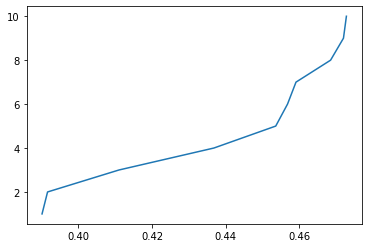

In [ ]:
n_range = range(1,11)
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

error = []

for n in n_range:
    classifier = KNeighborsClassifier()
    classifier.set_params(n_neighbors=n)
    classifier.fit(X_train_scaled, y_train)
    y_predw = classifier.predict(x_test_scaled)
    acc = accuracy_score(y_test,y_predw)
    error.append(acc)

import math
plt.plot(error,n_range)

In [ ]:
knn_obj = KNeighborsClassifier(n_neighbors=10)
knn_obj.fit(X_train_scaled, y_train)
y_prediction_knn = knn_obj.predict(x_test_scaled).astype(int)
accuracy_score_knn = accuracy_score(y_test, y_prediction_knn)
print(accuracy_score_knn)

##accuracy n=25 : 48.25%

0.4658


In [ ]:
#Running Model on PCA data
knn_obj = KNeighborsClassifier(n_neighbors=10)
knn_obj.fit(x_train_PCA, y_train)
y_prediction_knn_pc = knn_obj.predict(x_test_PCA).astype(int)
accuracy_score_knn_pc = accuracy_score(y_test, y_prediction_knn_pc)
print(accuracy_score_knn_pc)

0.4394


In [ ]:
print(classification_report(y_test, y_prediction_knn))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55      1021
           1       0.66      0.59      0.63      1013
           2       0.47      0.44      0.46       941
           3       0.31      0.32      0.31       958
           4       0.39      0.58      0.47      1032
           5       0.37      0.37      0.37      1024
           6       0.52      0.37      0.43       972
           7       0.47      0.49      0.48       983
           8       0.77      0.80      0.79      1022
           9       0.41      0.38      0.39      1034

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators= 100,criterion = 'entropy',max_depth=13, random_state=0)
clf.fit(X_train_scaled, y_train)
y_prediction_RF = clf.predict(x_test_scaled).astype(int)
accuracy_score_RF = accuracy_score(y_test, y_prediction_RF)
print(accuracy_score_RF)
#n_estimators= 25,criterion = 'entropy',max_depth=13, random_state=0 : 55.45
#n_estimators= 30,criterion = 'entropy',max_depth=13, random_state=0:56.07%
#n_estimators= 100,criterion = 'entropy',max_depth=13, random_state=0:56.36%

0.494


Logistic Regression

In [ ]:
Log_reg = LogisticRegression(penalty='l2',solver='liblinear',random_state=0)
Log_reg.fit(X_train_scaled, y_train)
y_prediction_lg = Log_reg.predict(x_test_scaled).astype(int)
accuracy_score_lg = accuracy_score(y_test, y_prediction_lg)
print(accuracy_score_lg)
#52.8

0.4469


SVC

In [ ]:
Supp = SVC()
Supp.fit(X_train_scaled, y_train)
y_prediction_svc = Supp.predict(x_test_scaled)
accuracy_score_svc = accuracy_score(y_test, y_prediction_svc)
print(accuracy_score_svc)
#56.04%

0.5159


Feature Selection to improve model performance

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression
y1 = df['music_genre']
X1 = df.drop('music_genre', axis = 1)

X_new = SelectKBest(f_regression, k=2).fit_transform(X1, y1)

In [ ]:
print("Feature data dimension: ", X.shape)
from numpy import array
select = SelectKBest(score_func=f_regression, k=5)
z = select.fit_transform(X1,y1)
print("After selecting best 3 features:", z.shape)

filter = select.get_support()
features = array(X1.columns)

print("All features:")
print(features)

print("Selected best 3:")
print(features[filter])
# print(z)

Feature data dimension:  (50000, 25)
After selecting best 3 features: (50000, 5)
All features:
['popularity' 'acousticness' 'danceability' 'duration_ms' 'energy'
 'instrumentalness' 'liveness' 'loudness' 'speechiness' 'tempo' 'valence'
 'Major' 'Minor' 'A' 'A#' 'B' 'C' 'C#' 'D' 'D#' 'E' 'F' 'F#' 'G' 'G#']
Selected best 3:
['popularity' 'acousticness' 'energy' 'loudness' 'speechiness']


In [ ]:
X_f = df[['popularity','acousticness','energy','loudness','speechiness']]
y_f = df['music_genre']

In [ ]:
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit(x_train_f,)

In [ ]:
X_train_scaledf = pd.DataFrame(scale.transform(x_train_f), columns=x_train_f.columns, index=x_train_f.index)

In [ ]:
X_test_scaledf =  pd.DataFrame(scale.transform(x_test_f), columns=x_test_f.columns, index=x_test_f.index)

In [ ]:
Supp = SVC()
Supp.fit(X_train_scaledf, y_train_f)
y_prediction_svc_f = Supp.predict(X_test_scaledf)
accuracy_score_svc_f = accuracy_score(y_test_f, y_prediction_svc_f)
print(accuracy_score_svc_f)
#49.1

0.491


In [ ]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train_scaledf, y_train_f)
y_prediction_lgf = Log_reg.predict(X_test_scaledf)
accuracy_score_lgf = accuracy_score(y_test_f, y_prediction_lgf)
print(accuracy_score_lgf)
#43.97

0.4397


In [ ]:
#Function to pass models and data
def get_metrics(model, X, y, y_names):
    clf = model

    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

    from sklearn.preprocessing import StandardScaler
    X_train_std = X_train[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']]
    scale = StandardScaler().fit(X_train[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']])

    X_train_scaled = pd.DataFrame(scale.transform(X_train[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']]), columns=X_train_std.columns, index=X_train_std.index)
    x_test_scaled = pd.DataFrame(scale.transform(X_test[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence']]), columns=X_train_std.columns, index=X_test.index)


    clf.fit(X_train_scaled, y_train)

    predict_train = clf.predict(X_train_scaled)
    predict_test = clf.predict(x_test_scaled)

    print(f"Train accuracy score: {accuracy_score(y_train, predict_train)*100:2.4}%")
    print(f"Test accuracy score: {accuracy_score(y_test, predict_test)*100:2.4}%\n")

    print('Classification Report for the test set:\n')
    print(classification_report(y_test, predict_test, target_names=y_names))
    print('Confusion Matrix:\n')
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, predict_test), annot = True, fmt = ".0f",
                cmap = "coolwarm", linewidths = 1, linecolor = "white",
                xticklabels = y_names, yticklabels = y_names)
    plt.show()

In [ ]:
X.shape

(50000, 25)

Train accuracy score: 59.9%
Test accuracy score: 57.41%

Classification Report for the test set:

              precision    recall  f1-score   support

 Alternative       0.44      0.37      0.40       990
       Anime       0.76      0.72      0.74       978
       Blues       0.60      0.51      0.55      1030
   Classical       0.85      0.85      0.85      1035
     Country       0.53      0.52      0.52      1008
  Electronic       0.64      0.63      0.63      1003
     Hip-Hop       0.45      0.50      0.48      1004
        Jazz       0.54      0.51      0.52      1005
         Rap       0.45      0.39      0.42       962
        Rock       0.50      0.73      0.59       985

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000

Confusion Matrix:



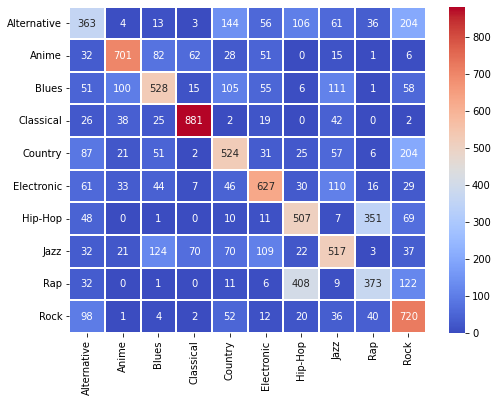

In [ ]:
get_metrics(SVC(), X,y, y_names)

Combinging Genres apart from Classical, Anime, Rap & Hip-Hop

In [ ]:
y_combined_1 = y.map({0:0, 1:1, 2:0, 3:2, 4:0, 5:0, 6:3, 7:0, 8:3, 9:0})
y_names_comb_1 = ['Other', 'Anime', 'Classical', 'Rap and Hip-Hop']

Train accuracy score: 87.26%
Test accuracy score: 86.83%

Classification Report for the test set:

                 precision    recall  f1-score   support

            All       0.87      0.93      0.90      5935
          Anime       0.85      0.68      0.76      1020
      Classical       0.87      0.82      0.84       999
Rap and Hip-Hop       0.87      0.81      0.84      2046

       accuracy                           0.87     10000
      macro avg       0.86      0.81      0.83     10000
   weighted avg       0.87      0.87      0.87     10000

Confusion Matrix:



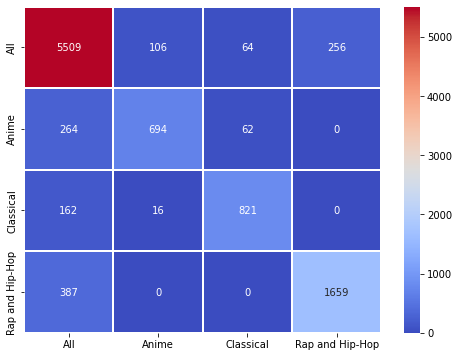

In [ ]:
get_metrics(SVC(), X,y_combined_1, y_names_comb_1)

Train accuracy score: 93.53%
Test accuracy score: 87.75%

Classification Report for the test set:

                 precision    recall  f1-score   support

          Other       0.88      0.94      0.91      5977
          Anime       0.89      0.66      0.76      1036
      Classical       0.86      0.82      0.84      1014
Rap and Hip-Hop       0.87      0.83      0.85      1973

       accuracy                           0.88     10000
      macro avg       0.88      0.81      0.84     10000
   weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:



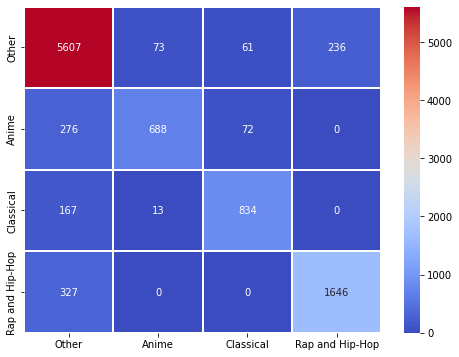

In [ ]:
get_metrics(RandomForestClassifier(n_estimators= 100,criterion = 'entropy',max_depth=13, random_state=0), X,y_combined_1, y_names_comb_1)

Train accuracy score: 81.86%
Test accuracy score: 82.17%

Classification Report for the test set:

                 precision    recall  f1-score   support

            All       0.84      0.91      0.87      6032
          Anime       0.71      0.49      0.58       966
      Classical       0.81      0.79      0.80       997
Rap and Hip-Hop       0.82      0.74      0.78      2005

       accuracy                           0.82     10000
      macro avg       0.79      0.73      0.76     10000
   weighted avg       0.82      0.82      0.82     10000

Confusion Matrix:



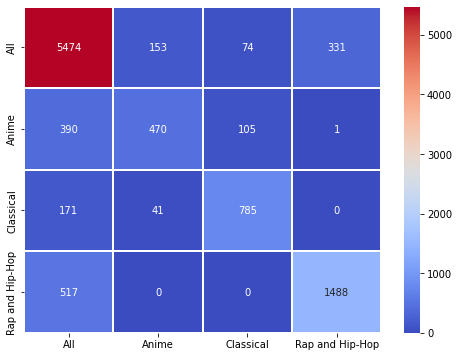

In [ ]:
get_metrics(LogisticRegression(), X,y_combined_1, y_names_comb_1)

Train accuracy score: 90.03%
Test accuracy score: 84.38%

Classification Report for the test set:

                 precision    recall  f1-score   support

            All       0.86      0.90      0.88      5924
          Anime       0.73      0.67      0.70       983
      Classical       0.84      0.75      0.79      1031
Rap and Hip-Hop       0.83      0.81      0.82      2062

       accuracy                           0.84     10000
      macro avg       0.82      0.78      0.80     10000
   weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:



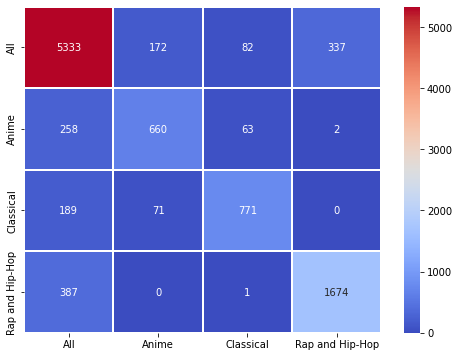

In [ ]:
get_metrics(DecisionTreeClassifier(criterion='entropy',max_depth = 11, random_state=0), X,y_combined_1, y_names_comb_1)

Train accuracy score: 86.78%
Test accuracy score: 84.59%

Classification Report for the test set:

                 precision    recall  f1-score   support

            All       0.85      0.92      0.89      6027
          Anime       0.83      0.60      0.70       999
      Classical       0.84      0.79      0.81       969
Rap and Hip-Hop       0.83      0.77      0.80      2005

       accuracy                           0.85     10000
      macro avg       0.84      0.77      0.80     10000
   weighted avg       0.84      0.85      0.84     10000

Confusion Matrix:



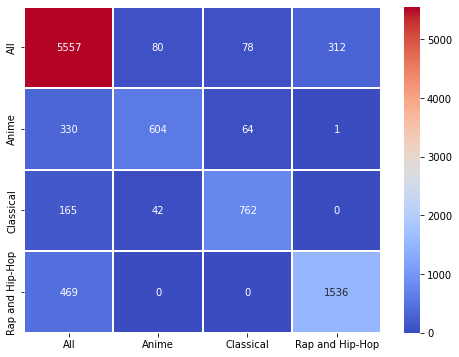

In [ ]:
get_metrics(KNeighborsClassifier(n_neighbors=10), X,y_combined_1, y_names_comb_1)